In [63]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# **Importing Datasets**

In [ ]:
train = pd.read_csv("UNSW_NB15_training-set.csv")
test = pd.read_csv("UNSW_NB15_testing-set.csv")
data = pd.concat([train, test], axis=0)

In [ ]:
data['service'].replace('-',np.nan,inplace=True)

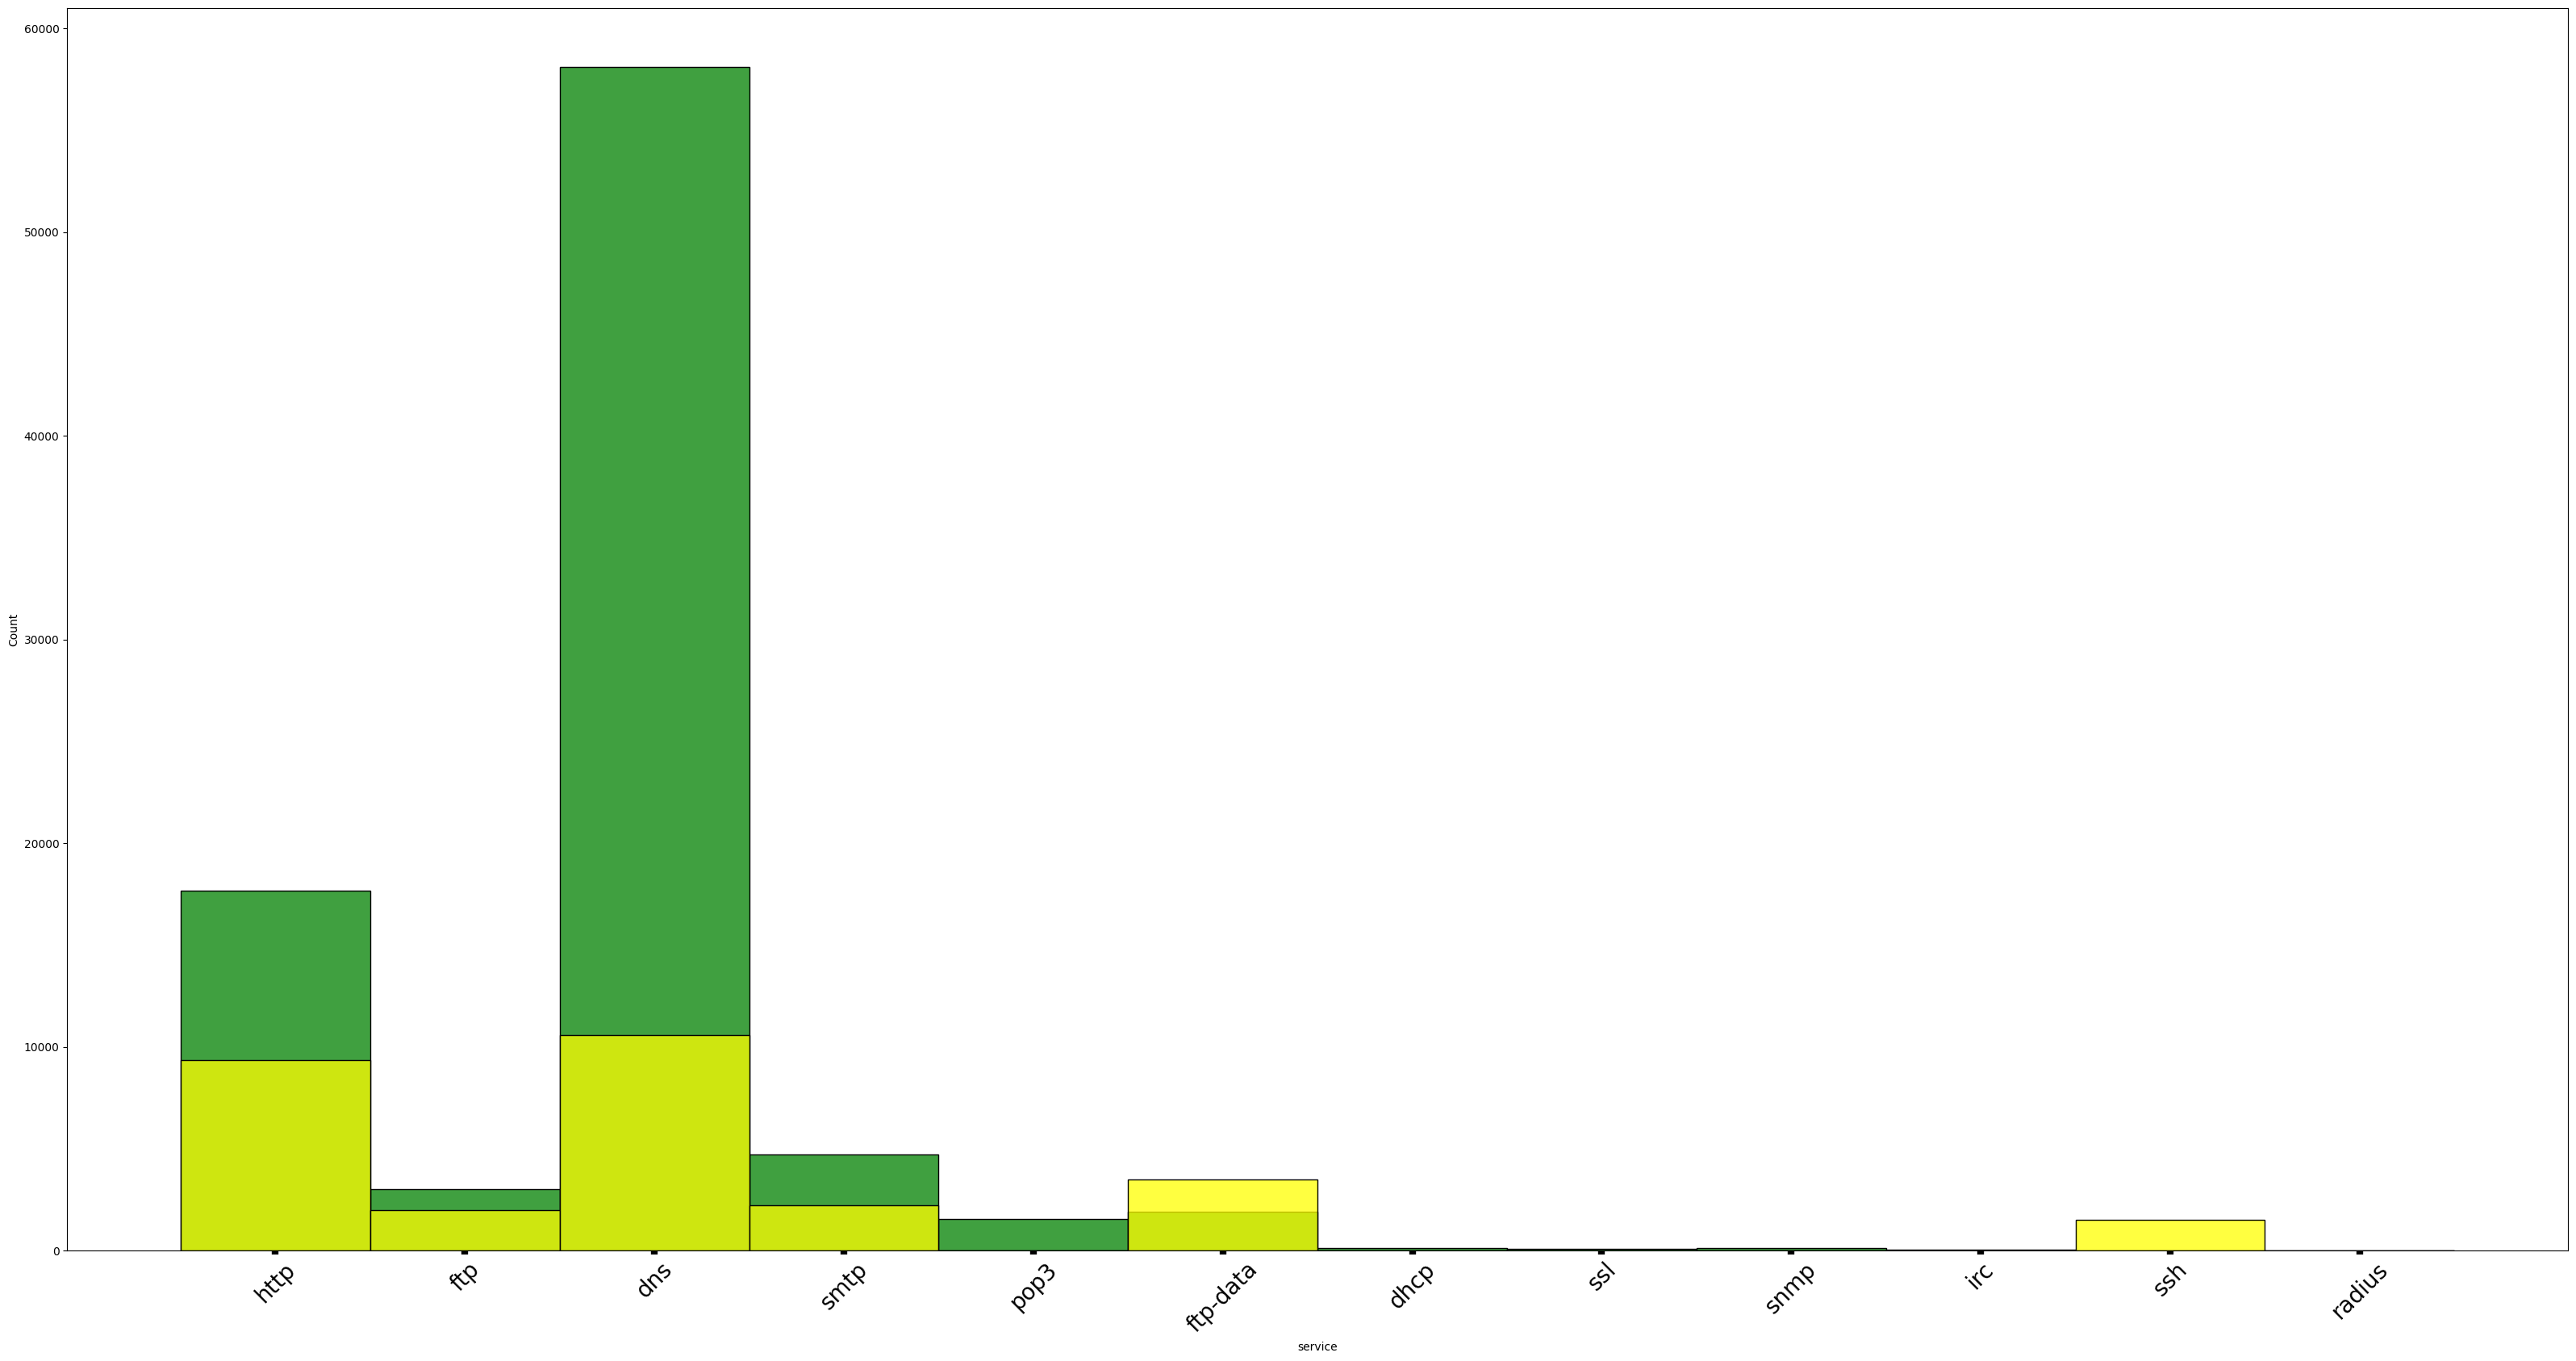

In [ ]:
f, axes = plt.subplots( figsize=(40, 20))
sns.histplot(data[data['label'] == 1]['service'], color='green')
sns.histplot(data[data['label'] ==0]['service'], color='yellow')
axes.tick_params('x', labelrotation=45,width=6,labelsize=20)

In [ ]:
data.isnull().sum()

id                        0
dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm    

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['attack_cat'].value_counts()

attack_cat
Generic           57956
Normal            29113
Exploits          21480
DoS                2508
Fuzzers            2266
Reconnaissance     2207
Analysis            564
Worms               148
Backdoor            110
Name: count, dtype: int64

In [ ]:
data['state'].value_counts()

state
INT    57894
FIN    47350
CON    10859
REQ      234
RST       14
ACC        1
Name: count, dtype: int64

In [ ]:
features = pd.read_csv("NUSW-NB15_features.csv",encoding='cp1252')
features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [ ]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [ ]:
features['Type '] = features['Type '].str.lower()

In [ ]:
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [ ]:
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [ ]:
for c in integer_names:
  pd.to_numeric(data[c])

In [ ]:
for c in binary_names:
  pd.to_numeric(data[c])

In [ ]:
for c in float_names:
  pd.to_numeric(data[c])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116352 entries, 3 to 82194
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 116352 non-null  int64  
 1   dur                116352 non-null  float64
 2   proto              116352 non-null  object 
 3   service            116352 non-null  object 
 4   state              116352 non-null  object 
 5   spkts              116352 non-null  int64  
 6   dpkts              116352 non-null  int64  
 7   sbytes             116352 non-null  int64  
 8   dbytes             116352 non-null  int64  
 9   rate               116352 non-null  float64
 10  sttl               116352 non-null  int64  
 11  dttl               116352 non-null  int64  
 12  sload              116352 non-null  float64
 13  dload              116352 non-null  float64
 14  sloss              116352 non-null  int64  
 15  dloss              116352 non-null  int64  
 16  sinpkt  

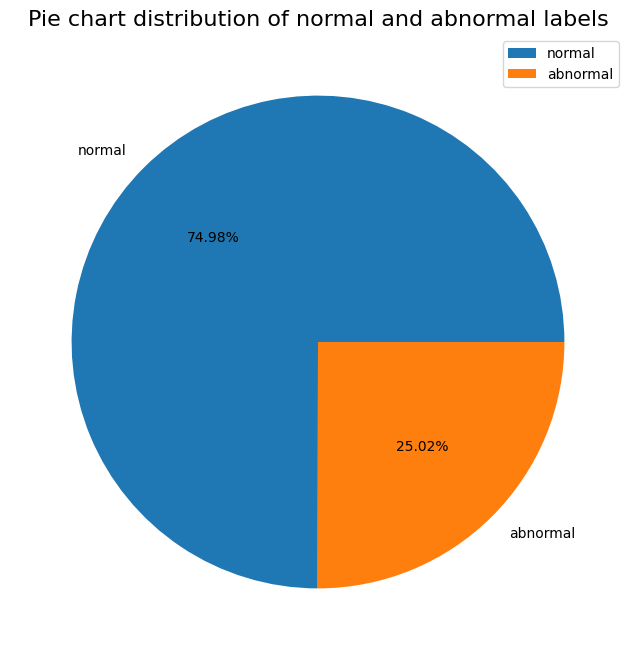

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

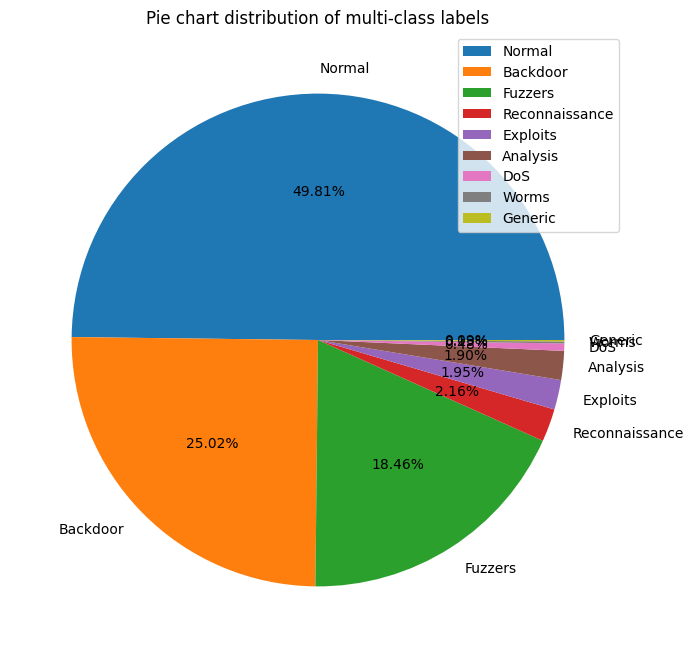

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.show()

In [ ]:
num_col = data.select_dtypes(include='number').columns
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [ ]:
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [ ]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data = pd.concat([data, data_cat],axis=1)

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')

In [ ]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,False,False,False,False,False,False,True,False,False,False
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,True,False,False,False,False,False,True,False,False,False
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,False,True,False,False,False,False,False,True,False,False
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,False,False,False,False,False,False,True,False,False,False
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
data = normalization(data.copy(),num_col)

In [ ]:
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802759e-02,0.001033,0.001089,0.000039,0.000053,0.000014,0.138393,0.992126,0.000001,...,False,False,False,False,False,False,True,False,False,False
11,12,3.488503e-02,0.005730,0.002541,0.003919,0.000151,0.000043,0.138393,0.992126,0.000092,...,True,False,False,False,False,False,True,False,False,False
15,16,3.333360e-08,0.000094,0.000000,0.000005,0.000000,0.500000,0.995536,0.000000,0.119792,...,False,True,False,False,False,False,False,True,False,False
17,18,6.559318e-03,0.000845,0.000726,0.000055,0.000075,0.000043,0.138393,0.992126,0.000007,...,False,False,False,False,False,False,True,False,False,False
21,22,5.633661e-03,0.000845,0.000545,0.000065,0.000018,0.000044,0.995536,0.992126,0.000009,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [ ]:
bin_data = data.copy()
bin_data['label'] = bin_label

In [ ]:
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [ ]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

In [ ]:
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [ ]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [ ]:
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [ ]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [ ]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

In [ ]:
num_col.append('label')

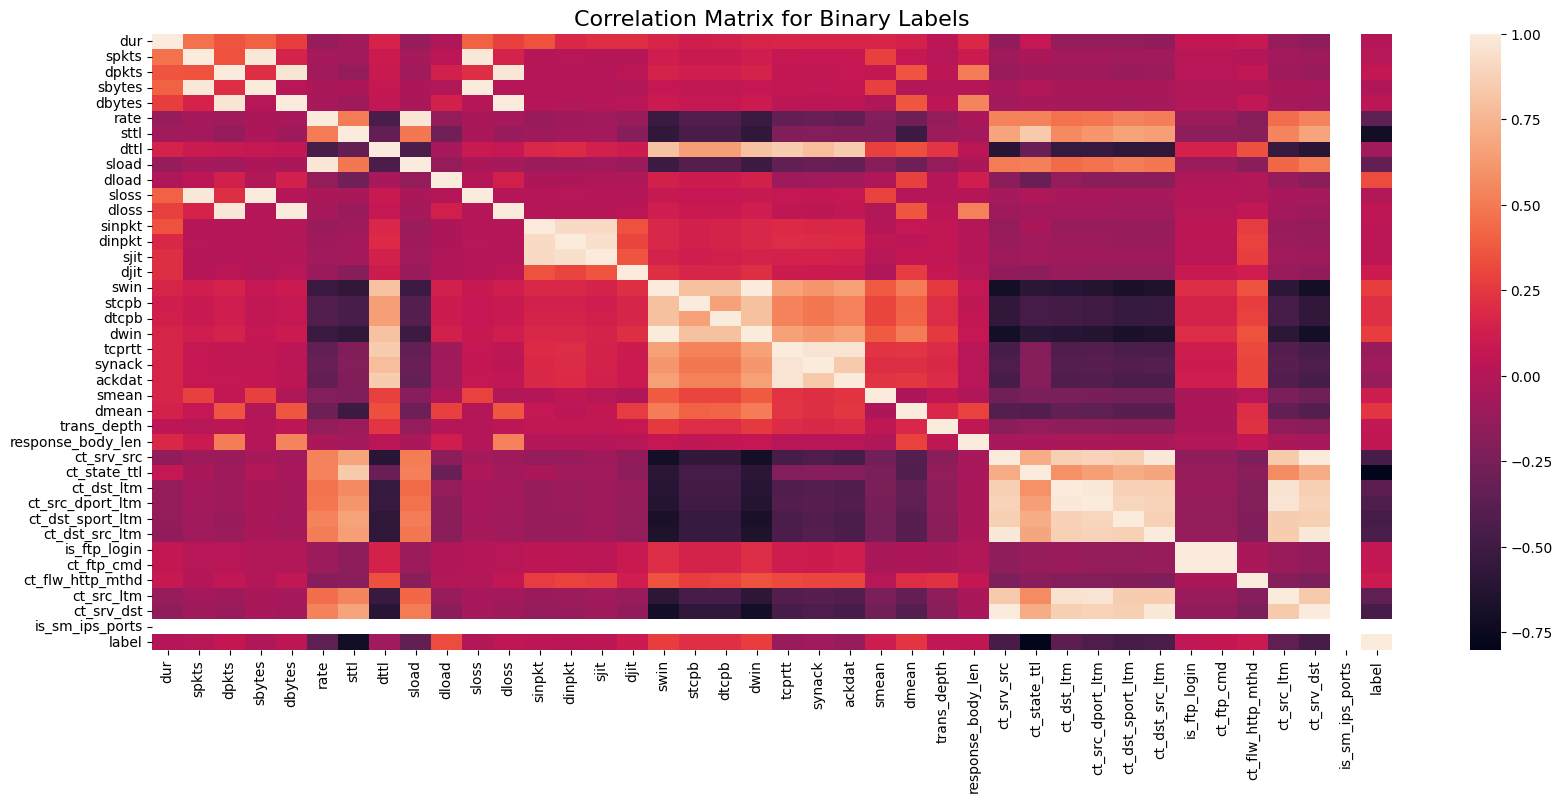

In [ ]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

In [ ]:
num_col = list(multi_data.select_dtypes(include='number').columns)

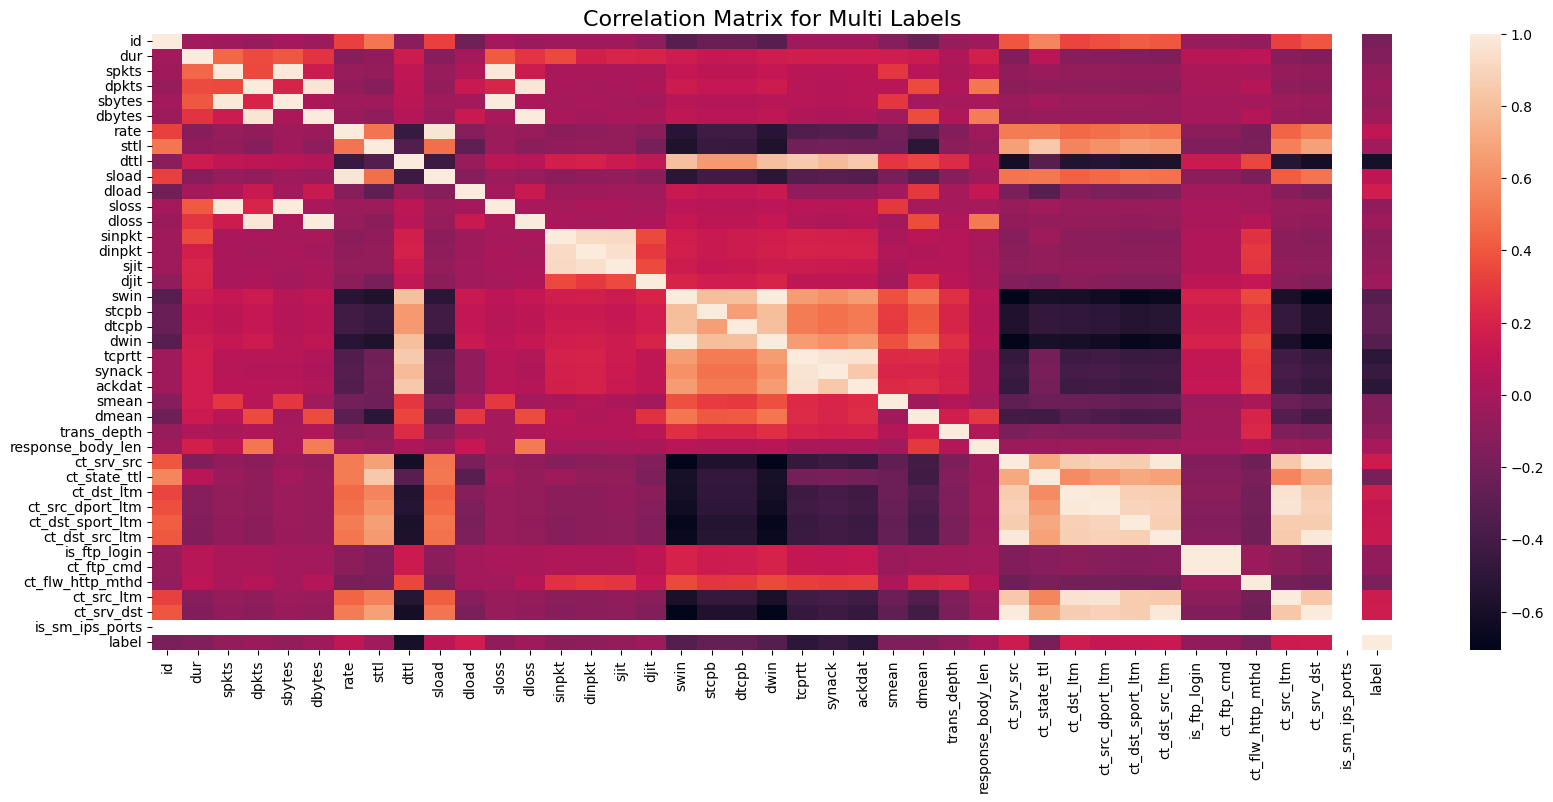

In [ ]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.show()

In [ ]:
l4=data[['attack_cat']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

lb_encoder4 =   LabelEncoder()
l4_= lb_encoder4.fit_transform(l4)

data["attack_cat"]=l4_

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
def constant_feature_detect(data, threshold=0.1):
    quasi_constant_feature = []
    for feature in data.columns:
        predominant = (data[feature].value_counts() / float(
                      len(data))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature), ' variables are found to be almost constant')
    return quasi_constant_feature

# the original dataset has no constant variable
quasi_constant_feature = constant_feature_detect(data=data, threshold=0.9)


0  variables are found to be almost constant


In [68]:
data.drop(quasi_constant_feature,axis=1,inplace=True)

In [ ]:
X         = data.iloc[:,:-3]
Y         = np.array(data.iloc[:,-3])
Y         = Y.reshape(len(Y),1)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Set aside 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=43)

# Further split the training data into 80% for training and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)


In [ ]:
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from sklearn.decomposition import PCA

In [ ]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [70]:
n_components = 10
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
distances_train, indices_train = knn.kneighbors(X_train_scaled)
distances_test, indices_test = knn.kneighbors(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#X_train_combined = np.concatenate([X_train_scaled, distances_train], axis=1)
#X_test_combined = np.concatenate([X_test_scaled, distances_test], axis=1)

# Reshape data for CNN-LSTM input
#X_train_combined_reshaped = X_train_combined.reshape(X_train_combined.shape[0], X_train_combined.shape[1], 1)
#X_test_combined_reshaped = X_test_combined.reshape(X_test_combined.shape[0], X_test_combined.shape[1], 1)


In [ ]:
#model_combined = Sequential()
#model_combined.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined_reshaped.shape[1], 1)))
#model_combined.add(MaxPooling1D(pool_size=3))
#model_combined.add(LSTM(units=40, activation='relu', return_sequences=True))
#model_combined.add(Dropout(0.1))
#model_combined.add(LSTM(units=20, activation='relu'))
#model_combined.add(Dropout(0.05))
#model_combined.add(Dense(units=10, activation='softmax'))

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Flatten
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [72]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Concatenate distances with scaled features
X_train_combined = np.concatenate([X_train_scaled, distances_train], axis=1)
X_test_combined = np.concatenate([X_test_scaled, distances_test], axis=1)

# Reshape data for CNN input
X_train_combined_reshaped = X_train_combined.reshape(X_train_combined.shape[0], X_train_combined.shape[1], 1)
X_test_combined_reshaped = X_test_combined.reshape(X_test_combined.shape[0], X_test_combined.shape[1], 1)

# Build the CNN model
model_combined = Sequential()
model_combined.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined_reshaped.shape[1], 1)))
model_combined.add(MaxPooling1D(pool_size=3))
model_combined.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_combined.add(MaxPooling1D(pool_size=3))
model_combined.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model_combined.add(MaxPooling1D(pool_size=2))
#model_combined.add(MaxPooling2D(pool_size=3))
model_combined.add(Dropout(0.25))
model_combined.add(Flatten())
model_combined.add(Dense(units=10, activation='softmax'))

# Compile the model
model_combined.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=5), ModelCheckpoint(filepath='best_model_combined.h5', monitor='val_loss', save_best_only=True)]

# Train the model
history_combined = model_combined.fit(X_train_combined_reshaped, y_train, epochs=50, batch_size=500, validation_data=(X_test_combined_reshaped, y_test), callbacks=callbacks)

Epoch 1/50
149/149 [==============================] - 6s 36ms/step - loss: 0.5437 - accuracy: 0.8447 - val_loss: 0.1056 - val_accuracy: 0.9698
Epoch 2/50
  3/149 [..............................] - ETA: 6s - loss: 0.1599 - accuracy: 0.9420

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


149/149 [==============================] - 5s 36ms/step - loss: 0.1120 - accuracy: 0.9614 - val_loss: 0.0621 - val_accuracy: 0.9786
Epoch 3/50
149/149 [==============================] - 5s 33ms/step - loss: 0.0816 - accuracy: 0.9709 - val_loss: 0.0515 - val_accuracy: 0.9788
Epoch 4/50
149/149 [==============================] - 6s 41ms/step - loss: 0.0750 - accuracy: 0.9724 - val_loss: 0.0496 - val_accuracy: 0.9804
Epoch 5/50
149/149 [==============================] - 5s 31ms/step - loss: 0.0704 - accuracy: 0.9733 - val_loss: 0.0511 - val_accuracy: 0.9786
Epoch 6/50
149/149 [==============================] - 5s 35ms/step - loss: 0.0633 - accuracy: 0.9759 - val_loss: 0.0423 - val_accuracy: 0.9816
Epoch 7/50
149/149 [==============================] - 5s 36ms/step - loss: 0.0614 - accuracy: 0.9770 - val_loss: 0.0403 - val_accuracy: 0.9819
Epoch 8/50
149/149 [==============================] - 5s 30ms/step - loss: 0.0541 - accuracy: 0.9782 - val_loss: 0.0443 - val_accuracy: 0.9826
Epoch 9/50

In [73]:
model_combined.layers

In [76]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

model_combined.compile(loss='sparse_categorical_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])

callbacks_combined = [EarlyStopping(monitor='val_loss', patience=3),
                     ModelCheckpoint(filepath='best_model_combined', monitor='val_loss', save_best_only=True)]
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_combined_reshaped, y_train, test_size=0.2, random_state=42)

# Define callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model_combined.h5', monitor='val_loss', save_best_only=True)]

# Train the model
history_combined = model_combined.fit(X_train, y_train,
                                      epochs=100,
                                      validation_data=(X_val, y_val),
                                      batch_size=500,
                                      callbacks=callbacks)


Epoch 1/100
120/120 [==============================] - 5s 31ms/step - loss: 0.1959 - accuracy: 0.9180 - val_loss: 0.0738 - val_accuracy: 0.9772
Epoch 2/100
  5/120 [>.............................] - ETA: 2s - loss: 0.1930 - accuracy: 0.9104

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 [==============================] - 7s 55ms/step - loss: 0.1663 - accuracy: 0.9239 - val_loss: 0.0677 - val_accuracy: 0.9786
Epoch 3/100
120/120 [==============================] - 5s 45ms/step - loss: 0.3774 - accuracy: 0.8604 - val_loss: 0.5440 - val_accuracy: 0.7661
Epoch 4/100
120/120 [==============================] - 3s 29ms/step - loss: 0.5415 - accuracy: 0.7689 - val_loss: 0.5442 - val_accuracy: 0.7661
Epoch 5/100
120/120 [==============================] - 5s 39ms/step - loss: 0.5412 - accuracy: 0.7689 - val_loss: 0.5455 - val_accuracy: 0.7661
Epoch 6/100
120/120 [==============================] - 3s 28ms/step - loss: 0.5421 - accuracy: 0.7689 - val_loss: 0.5440 - val_accuracy: 0.7661
Epoch 7/100
120/120 [==============================] - 3s 29ms/step - loss: 0.5417 - accuracy: 0.7689 - val_loss: 0.5449 - val_accuracy: 0.7661


In [77]:
import matplotlib.pyplot as plt

def plot_training_vs_validation(history, model):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))


    # Accuracy Plot
    ax[0].plot(history.history['accuracy'], 'b-', label="Training Accuracy")
    ax[0].plot(history.history['val_accuracy'], 'r-', label="Validation Accuracy")
    ax[0].set_title('Training vs Validation Accuracy - ' + model)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].grid(True)
    ax[0].legend()

    # Loss Plot
    ax[1].plot(history.history['loss'], 'g-', label="Training Loss")
    ax[1].plot(history.history['val_loss'], 'c-', label="Validation Loss")
    ax[1].set_title('Training vs Validation Loss - ' + model)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].grid(True)
    ax[1].legend()

    plt.tight_layout()
    plt.show()



In [ ]:
plot_training_vs_validation(history_combined,"ADAM-CNN")